
# Bureau of Labor and Statistics



## Load and Clean our Data


In [114]:
# Import our libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [115]:
# Read in our files
# Merge our datasets
df1 = pd.read_csv('/Users/jasonrobinson/Downloads/file.csv')
df2 = pd.read_csv('/Users/jasonrobinson/Downloads/file-2.csv')
df3 = pd.read_csv('/Users/jasonrobinson/Downloads/file-3.csv')

new_df = pd.concat([df1, df2, df3])
print(new_df.shape)
new_df.head()

(432, 5)


,Series ID,Year,Period,Label,Value
0,CES0500000002,2016,M01,2016 Jan,34.6
1,CES0500000002,2016,M02,2016 Feb,34.4
2,CES0500000002,2016,M03,2016 Mar,34.4
3,CES0500000002,2016,M04,2016 Apr,34.4
4,CES0500000002,2016,M05,2016 May,34.4


In [20]:
# Average hours worked 2021 seasonly adjusted
#df3[df3['Year']==2018].describe()

In [4]:
#df3['Year'].describe()

In [5]:
# We need to clean up our dataframe by data wrangling
# Begin by removing nan values
#df.apply(lambda x: pd.Series(x.dropna().values))

In [6]:
# pip install prettytable


<h2 id="moduleSubTitle"> Consumer Price Index </h2>

The Consumer Price Index (CPI) is a measure of the average change overtime in the prices paid by urban consumers for a market basket of consumer goods and services (BLS 2022).

<h2 id="moduleSubTitle"> CPI Market Basket </h2>

**Shelter** is a major part of the market basket, and the two measures of price change for CPI are that of _Owners' equivalent rent of primary residence and Rent of primary residence_. The Market Basket consists of the daily consumption rate for goods and services.

CPI data for rent collection is derived from a bi-annual schedule every 6 months from start date, allowing for a much larger sample. According to the CPI Housing Survey, "The CPI divides each area’s rent sample into six sub-samples called _panels."_ The overall design of the survey is complex, and for the purpose of this small project we will limit deep exploration to grab a general understanding of the relationships.

Using data from the Census, there are 87 different pricing areas, for which the CPI further sections off areas according to _segments_. **Segments** are determined using a stratified sampling of proportion approach to calculate the total spending for each segment.

The samples are weighted for each housing unit and is relative the owner and renter's spending divided equally the sample units. A portion of the weight is applied to the owner, and a part to the renter.

Ua,i
αi,a,
(1- αi,a)
Ua,i


## EDA

In [4]:
new_df.describe()

,Year,Value
count,432.000000,432.000000
mean,2018.500000,52300.774074
std,1.709805,67136.703452
min,2016.000000,34.100000
25%,2017.000000,34.400000
50%,2018.500000,9558.500000
75%,2020.000000,144273.250000
max,2021.000000,153095.000000


In [30]:
new_df['Label'].unique()

array(['2016 Jan', '2016 Feb', '2016 Mar', '2016 Apr', '2016 May',
       '2016 Jun', '2016 Jul', '2016 Aug', '2016 Sep', '2016 Oct',
       '2016 Nov', '2016 Dec', '2017 Jan', '2017 Feb', '2017 Mar',
       '2017 Apr', '2017 May', '2017 Jun', '2017 Jul', '2017 Aug',
       '2017 Sep', '2017 Oct', '2017 Nov', '2017 Dec', '2018 Jan',
       '2018 Feb', '2018 Mar', '2018 Apr', '2018 May', '2018 Jun',
       '2018 Jul', '2018 Aug', '2018 Sep', '2018 Oct', '2018 Nov',
       '2018 Dec', '2019 Jan', '2019 Feb', '2019 Mar', '2019 Apr',
       '2019 May', '2019 Jun', '2019 Jul', '2019 Aug', '2019 Sep',
       '2019 Oct', '2019 Nov', '2019 Dec', '2020 Jan', '2020 Feb',
       '2020 Mar', '2020 Apr', '2020 May', '2020 Jun', '2020 Jul',
       '2020 Aug', '2020 Sep', '2020 Oct', '2020 Nov', '2020 Dec',
       '2021 Jan', '2021 Feb', '2021 Mar', '2021 Apr', '2021 May',
       '2021 Jun', '2021 Jul', '2021 Aug', '2021 Sep', '2021 Oct',
       '2021 Nov', '2021 Dec'], dtype=object)

In [131]:
new_df['Period'].unique()

array(['M01', 'M02', 'M03', 'M04', 'M05', 'M06', 'M07', 'M08', 'M09',
       'M10', 'M11', 'M12'], dtype=object)

In [32]:
new_df['Year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021])

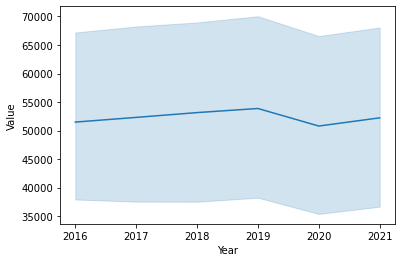

In [64]:
sns.lineplot(new_df['Year'], new_df['Value']);


### BLS Analysis


In [50]:
# Load data
curr_emp = pd.read_excel('/Users/jasonrobinson/Documents/Projects/BLS_annex/CEU-SeriesReport.xlsx')
export_mnth = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/export_monthly.csv')
import_mnth = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/import_monthly.csv')
midwest_cpi = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/midwest-cpi.csv')
emp_levels = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/eployment_levels_seas.csv')
labor_stats = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/labor_force_stats.csv')
emp_seas = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/all_employees_seas.csv')
mort_paid = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/mortgage_principal_paid.csv')
cpi_urban = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_all_urban_cpiu.csv')
ann_income = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/annl_expend_income_all_units.csv')
wages_age = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/wages_salaries_age.csv')
wages_occ = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/wages_salaries_occupation.csv')
wages_hours = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/Employment, Hours, and Earnings...(National).csv')

In [96]:
# Let's take a look at the shape of our datasets
# Group like shapes
# Each of these datasets can represent our features in custom dataset
print('\n','Current Employment:', curr_emp.shape,  '\n', 'Export Month:', export_mnth.shape, '\n',
      'Import Month:', import_mnth.shape,  '\n', 'Midwest CPI:', midwest_cpi.shape,  '\n',
      'Employee Levels:', emp_levels.shape,  '\n', 'Labor Statistics:', labor_stats.shape, '\n',
      'Employee Seasonal:', emp_seas.shape,  '\n', 'Mortgage Paid:', mort_paid.shape,  '\n', 
      'CPI Urban:', cpi_urban.shape, '\n', 'Annual Income:', ann_income.shape,  '\n', 
      'Wages by Age:', wages_age.shape,  '\n', 'Wages by Occupation:', wages_occ.shape, '\n',
      'Wages Hours:', wages_hours.shape)


 Current Employment: (133, 6) 
 Export Month: (121, 5) 
 Import Month: (121, 5) 
 Midwest CPI: (870, 5) 
 Employee Levels: (121, 5) 
 Labor Statistics: (145, 5) 
 Employee Seasonal: (242, 5) 
 Mortgage Paid: (121, 5) 
 CPI Urban: (121, 5) 
 Annual Income: (22, 5) 
 Wages by Age: (22, 5) 
 Wages by Occupation: (11, 5) 
 Wages Hours: (363, 5)


In [67]:
# Consumer spending on goods and services
cpi_urban.head()

,Series ID,Year,Period,Label,Value
0,CUUR0000SA0,2012,M01,2012 Jan,226.665
1,CUUR0000SA0,2012,M02,2012 Feb,227.663
2,CUUR0000SA0,2012,M03,2012 Mar,229.392
3,CUUR0000SA0,2012,M04,2012 Apr,230.085
4,CUUR0000SA0,2012,M05,2012 May,229.815


In [68]:
emp_levels.head()

,Series ID,Year,Period,Label,Value
0,LNS12000000,2012,M01,2012 Jan,141584
1,LNS12000000,2012,M02,2012 Feb,141858
2,LNS12000000,2012,M03,2012 Mar,142036
3,LNS12000000,2012,M04,2012 Apr,141899
4,LNS12000000,2012,M05,2012 May,142206


In [69]:
mort_paid.head()

,Series ID,Year,Period,Label,Value
0,CUUR0000SA0,2012,M01,2012 Jan,226.665
1,CUUR0000SA0,2012,M02,2012 Feb,227.663
2,CUUR0000SA0,2012,M03,2012 Mar,229.392
3,CUUR0000SA0,2012,M04,2012 Apr,230.085
4,CUUR0000SA0,2012,M05,2012 May,229.815


In [76]:
wages_age.head()

,Series ID,Year,Period,Label,Value
0,CXU900000LB0401M,2010,A01,2010 Annual,49568
1,CXU900000LB0401M,2011,A01,2011 Annual,49805
2,CXU900000LB0401M,2012,A01,2012 Annual,51730
3,CXU900000LB0401M,2013,A01,2013 Annual,50168
4,CXU900000LB0401M,2014,A01,2014 Annual,51889


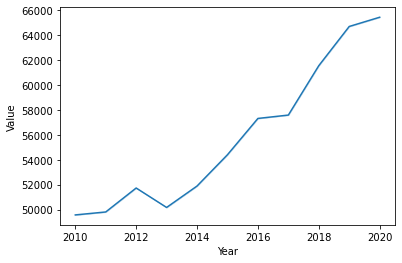

In [83]:
# 
sns.lineplot(wages_age['Year'], wages_age['Value']);

In [90]:
#merged_bls = pd.concat(
#                map(pd.read_csv, [
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/export_monthly.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/import_monthly.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/midwest-cpi.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/eployment_levels_seas.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/labor_force_stats.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/all_employees_seas.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/mortgage_principal_paid.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_all_urban_cpiu.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/annl_expend_income_all_units.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/wages_salaries_age.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/wages_salaries_occupation.csv',
#                '/Users/jasonrobinson/Documents/Projects/bls_project/data/Employment, Hours, and Earnings...(National).csv'
#                ]),ignore_index=True)

In [104]:
#print(merged_bls.shape)
merged_bls=merged_bls.head().T
merged_bls

,Series ID,Year,Period,Label,Value
0,EIUIQ,2012,M01,2012 Jan,132.5
1,EIUIQ,2012,M02,2012 Feb,133.1
2,EIUIQ,2012,M03,2012 Mar,134.1
3,EIUIQ,2012,M04,2012 Apr,134.7
4,EIUIQ,2012,M05,2012 May,134


In [102]:
# Rename headers
bls_clean = merged_bls.drop(merged_bls[:0], axis=0)
bls_clean

ValueError: cannot copy sequence with size 0 to array axis with dimension 5

In [94]:
# Look at our unique values for series id
#merged_bls['Series ID'].unique()

array(['EIUIQ', 'EIUIR', 'CUUR0000SA0', 'CUURN200SA0LE', 'CUURN200SAA',
       'CUURN200SAC', 'CUURN200SAD', 'CUURN200SAE', 'LNS12000000',
       'LNS16000000', 'CES0500000001', 'CES3000000001',
       'CXU900000LB1201M', 'CXUTOTALEXPLB0101M', 'CXU900000LB0401M',
       'CES0500000002', 'CES6000000001', 'CEU0000000001'], dtype=object)

In [116]:
# wide distribution or variance?
midwest_cpi.describe()

,Year,Value
count,870.000000,870.000000
mean,2015.544828,137.076269
std,3.483935,52.541142
min,2010.000000,77.400000
25%,2013.000000,90.851000
50%,2016.000000,131.733000
75%,2019.000000,141.703500
max,2022.000000,281.148000


In [27]:
def pathFinder():
    """
    Create a funtion that will iterate through the datasets and combine
    or join datasets
    
    Params:
    
    Returns:
    """
    pass

In [18]:
print(export.shape)
export.head()

(121, 5)


,Series ID,Year,Period,Label,Value
0,EIUIQ,2012,M01,2012 Jan,132.5
1,EIUIQ,2012,M02,2012 Feb,133.1
2,EIUIQ,2012,M03,2012 Mar,134.1
3,EIUIQ,2012,M04,2012 Apr,134.7
4,EIUIQ,2012,M05,2012 May,134.0


In [29]:
import_monthly.describe()

,Year,Value
count,121.000000,121.000000
mean,2016.545455,129.454545
std,2.915476,7.775249
min,2012.000000,117.200000
25%,2014.000000,123.200000
50%,2017.000000,126.500000
75%,2019.000000,137.900000
max,2022.000000,144.200000


In [25]:
export.describe()

,Year,Value
count,121.000000,121.000000
mean,2016.545455,128.166116
std,2.915476,6.582889
min,2012.000000,118.100000
25%,2014.000000,122.900000
50%,2017.000000,126.300000
75%,2019.000000,132.900000
max,2022.000000,148.300000


In [81]:
cpi.head()

,CPI for All Urban Consumers (CPI-U),Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Original Data Value,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CUUR0000SA0L1E,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN
4,Series Title:,All items less food and energy in U.S. city av...,NaN,NaN,NaN,NaN


In [71]:
curr_emp.head()

,"Employment, Hours, and Earnings from the Current Employment Statistics survey (National)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,Original Data Value,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN
2,Series Id:,CEU0800000003,NaN,NaN,NaN,NaN
3,Not Seasonally Adjusted,NaN,NaN,NaN,NaN,NaN
4,Series Title:,"Average hourly earnings of all employees, priv...",NaN,NaN,NaN,NaN


In [21]:
wages_hours.head()

,Series ID,Year,Period,Label,Value
0,CES0500000002,2012,M01,2012 Jan,34.5
1,CES0500000002,2012,M02,2012 Feb,34.5
2,CES0500000002,2012,M03,2012 Mar,34.4
3,CES0500000002,2012,M04,2012 Apr,34.5
4,CES0500000002,2012,M05,2012 May,34.4


In [42]:
print('ppi_commodity Shape', ppi_commodity.shape)
print('consumer_pi Shape', consumer_pi.shape)
print('current_employment Shape', current_employment.shape)
print('wages_hours Shape', wages_hours.shape)      

ppi_commodity Shape (5, 5)
consumer_pi Shape (152, 6)
current_employment Shape (133, 6)
wages_hours Shape (363, 5)


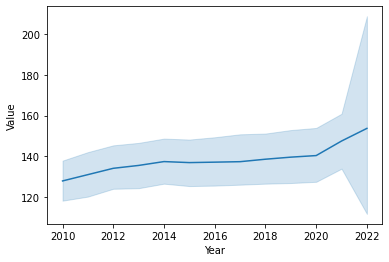

In [45]:
# Consumer spending in the midwest
sns.lineplot(midwest_cpi['Year'], midwest_cpi['Value']);

In [95]:
sns.lineplot(cpi['Year'], cpi['Value']);

KeyError: 'Year'

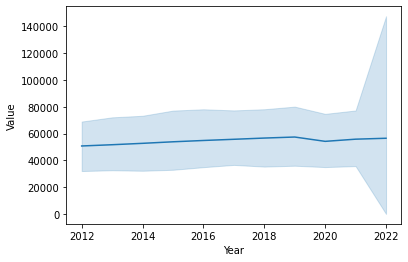

In [46]:
sns.lineplot(wages_hours['Year'], wages_hours['Value']);

In [113]:
sns.lineplot(cpi['Year'], cpi['Value']);

KeyError: 'Year'

In [ ]:
sns.lineplot(ceu['Year'], ceu['Value']);

In [ ]:
sns.lineplot(ppi['Year'], ppi['Value']);

In [46]:
ppi_commodity = ppi_commodity[3][1:122]

In [47]:
ppi_commodity

Unnamed: 1        130.6
Unnamed: 2        130.5
Unnamed: 3        130.8
Unnamed: 4          131
Unnamed: 5        131.1
                 ...   
Unnamed: 117    139.366
Unnamed: 118    138.396
Unnamed: 119    138.981
Unnamed: 120    138.598
Unnamed: 121    138.691
Name: 3, Length: 121, dtype: object

In [74]:
for i in range(len(ppi_commodity)):
    vect = ppi_commodity[i]
    print(vect)

130.6
130.5
130.8
131
131.1
131.3
132.3
132.5
131.9
130.5
130.8
131
130.5
130.8
130.8
130.8
130
129.7
129.7
129.9
130.4
130.7
130.4
130.5
130.9
131
131
130.8
131.2
131.4
131.2
131.4
131.3
132
131.9
130.7
131.9
132.7
133.4
132.6
132.7
132.5
133.4
133.5
133.8
134.3
134.5
134.7
133.5
132.8
133.3
133
134.1
134
133.3
132.9
133.3
133.8
133.6
134.5
135
135.2
135.9
136.2
133.9
134.3
132.6
132.1
132.2
133.4
134
134
133.4
133.4
133.9
133.8
133.6
134.3
134.5
134.8
134.8
134.1
133.9
134
134.5
134.8
135.1
135.3
134.8
135.3
135.1
135.1
135.5
134.4
134.5
134.4
133.2
134.4
134
134.7
134.2
134.1
134.4
134.9
135.1
134.3
135.5
136
136.2
136.3
136.1
136.4
137.3
137.9
138.839
139.687
139.366
138.396
138.981
138.598
138.691



## Notes

Understand the source of where the data is coming from. If Census, account for the error or disparity in under representative populations.

- Around 14,500 families are surveyed by phone for TPOPS (Telephone Point-of-Purchase Survey)?

Does not seem representative, will determine after anaysis.


## Current Population Survey

The Current Population Survey (CPS) is a monthly survey of households conducted by the Bureau of Census for the Bureau of Labor Statistics. It provides a comprehensive body of data on the [labor force](https://www.bls.gov/cps/lfcharacteristics.htm#laborforce), [employment](https://www.bls.gov/cps/lfcharacteristics.htm#emp), [unemployment](https://www.bls.gov/cps/lfcharacteristics.htm#unemp), persons [not in the labor force](https://www.bls.gov/cps/lfcharacteristics.htm#nlf), [hours of work](https://www.bls.gov/cps/lfcharacteristics.htm#hours), [earnings](https://www.bls.gov/cps/earnings.htm), and other [demographic](https://www.bls.gov/cps/demographics.htm) and[ labor force characteristics](https://www.bls.gov/cps/lfcharacteristics.htm).

#### CPS Databases include:
- **Labor Force Statistics**
- **Weekly and Hourly Earnings**
- **Union Affiliation Data** - (Not included in this analysis)
- **Marital and Family Labor Statistics** - (Not included in this analysis)

In [ ]:
"""
For the labor force stats we will examiine the following areas of the 
labor force: ***All are Seasonly Adjusted***
                Unemployment Rate, Labor Force Participation Rate,
                Employment Level , Unemployment Level, Unemployment Rate -Black,
                Labor Force Participation Rate - Men 20+, Unemployment White, 
                Unemployment Asian, Labor Force Participation Rate - Women 20+,
                Unemployment Rate - 20 yrs. & over, Men, Unemployment Rate - Hispanic or Latino,
                Employment-Population Ratio, Not in Labor Force, Employment-Population Ratio-25-54yrs,
                Labor Force Participation Rate - 25-54 yrs.

"""

In [118]:
#df = pd.read_csv('/Users/jasonrobinson/Documents/Projects/bls_project/data/cpi_analysis_22.csv')
#print(df.shape)
#df.head()


#### HOUSEHOLD DATA

ANNUAL AVERAGES
Employment status of the civilian noninstitutional population, 1951 to date [Numbers in thousands]

In [130]:
# Labor force statistics form the current population survey
labor_force = pd.read_excel('/Users/jasonrobinson/Downloads/cpsaat01.xlsx', skiprows=7)
print(labor_force.shape)
labor_force.head()

(73, 11)


,Persons 16 years of age and over,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,1951,104621.0,62017.0,59.2,59961.0,57.3,6726.0,53235.0,2055.0,3.3,42604.0
1,1952,105231.0,62138.0,59.0,60250.0,57.3,6500.0,53749.0,1883.0,3.0,43093.0
2,1953,107056.0,63015.0,58.9,61179.0,57.1,6260.0,54919.0,1834.0,2.9,44041.0
3,1954,108321.0,63643.0,58.8,60109.0,55.5,6205.0,53904.0,3532.0,5.5,44678.0
4,1955,109683.0,65023.0,59.3,62170.0,56.7,6450.0,55722.0,2852.0,4.4,44660.0


In [129]:
labor_force['Unnamed: 1']

0     104621.0
1     105231.0
2     107056.0
3     108321.0
4     109683.0
        ...   
68    259175.0
69    260329.0
70    261445.0
71         NaN
72         NaN
Name: Unnamed: 1, Length: 73, dtype: float64

In [127]:
# Make some headers for our Unnamed columns 
dict = {}
for i in range(len(labor_force)):
    print(labor_force[0])

KeyError: 0

In [117]:
df['Series ID']

0      CUUR0000SA0
1      CUUR0000SA0
2      CUUR0000SA0
3      CUUR0000SA0
4      CUUR0000SA0
          ...     
140    CUUR0000SA0
141    CUUR0000SA0
142    CUUR0000SA0
143    CUUR0000SA0
144    CUUR0000SA0
Name: Series ID, Length: 145, dtype: object


<h3 id="moduleTitle"> Consumer Expenditure Survey </h3>


<h4 id="moduleSubTitle"> Weekly and hourly earnings data from the Current Population Survey </h4>

Hourly wages and salary workers consists of two groups with the highest wages, but also with the greatest level of variability.



### Resources

[Weekly and hourly earnings data from the Current Population Survey](https://beta.bls.gov/dataViewer/view)

[Consumer Expenditure Survey](https://beta.bls.gov/dataQuery/find?fq=survey:[cx]&s=popularity:D&r=100&st=0)

[Price and Index Number Research](https://www.bls.gov/pir/)

[Import/Export Price Indexes](https://beta.bls.gov/dataQuery/find?fq=survey:%5Bei%5D&s=popularity:D)

[Consumer Price Index](https://www.bls.gov/cpi/overview.htm)

[Producer Price Indexes](https://www.bls.gov/ppi/)

[CPI-UNADJ](https://beta.bls.gov/dataQuery/find?st=0&r=20&q=cpi&more=0)

In [ ]:
emp_cost = 'https://download.bls.gov/pub/time.series/ci/'

In [52]:
headers = [['series_id', 'year', 'period', 'value', 'footnote_codes']]

In [67]:
import pandas as pd
ci_data =  'https://download.bls.gov/pub/time.series/ci/ci.data.1.AllData'
df = pd.read_csv(ci_data, delimiter=' ')
print(df.shape)
df.sample(10)

(96214, 16)


,series_id,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,\tyear\tperiod\t,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,value\tfootnote_codes
56552,CIU201G000000710A\t2016\tQ03\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN
92965,CIU3020000100000Q\t2011\tQ03\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.5,NaN,NaN,NaN,NaN,NaN,NaN
17582,CIS2030000100000Q\t2007\tQ03\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.7,NaN,NaN,NaN,NaN,NaN,NaN
85879,CIU2030000000510I\t2002\tQ04\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,81.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
39354,CIU2010000000249I\t2009\tQ01\t,NaN,NaN,NaN,NaN,NaN,NaN,109.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7509,CIS2014400000000Q\t2005\tQ02\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.6,NaN,NaN,NaN,NaN,NaN,NaN
23443,CIU1010000220000A\t2020\tQ03\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,NaN
75450,CIU2025200000000I\t2020\tQ03\t,NaN,NaN,NaN,NaN,NaN,NaN,142.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
32539,CIU1023000000000A\t2016\tQ01\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.6,NaN,NaN,NaN,NaN,NaN,NaN
39632,CIU2010000000510I\t2003\tQ02\t,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [70]:
import pandas as pd
ci_data =  'https://download.bls.gov/pub/time.series/ci/ci.data.1.AllData'
df = pd.read_csv(ci_data, delimiter=' ', skipinitialspace=True)
print(df.shape)
df.sample(10)

(96214, 3)


,series_id,\tyear\tperiod\t,value\tfootnote_codes
91863,CIU3016200000000I\t2012\tQ01\t,121.1\t,NaN
72947,CIU2023211000000Q\t2020\tQ02\t,1.2\t,NaN
9807,CIS2016230000000I\t2008\tQ04\t,109.4\t,NaN
84782,CIU202S000300000Q\t2016\tQ03\t,1.0\t,NaN
16104,CIS2026200000000I\t2005\tQ01\t,98.0\t,NaN
68417,CIU2020000430000A\t2008\tQ02\t,3.3\t,NaN
32990,CIU1026100000000A\t2001\tQ02\t,3.8\t,NaN
59166,CIU201S000100000I\t2010\tQ02\t,112.9\t,NaN
40639,CIU2010000100710I\t2007\tQ01\t,104.5\t,NaN
20730,CIS3026105000000Q\t2006\tQ03\t,1.5\t,NaN


In [62]:
df.isnull().sum()

series_id                    0
Unnamed: 1               96214
Unnamed: 2               96214
Unnamed: 3               96214
Unnamed: 4               96214
Unnamed: 5               96214
Unnamed: 6               96214
Unnamed: 7               68973
\tyear\tperiod\t         86729
Unnamed: 9               36900
Unnamed: 10              96214
Unnamed: 11              96040
Unnamed: 12              96214
Unnamed: 13              96214
Unnamed: 14              96214
value\tfootnote_codes    96214
dtype: int64

In [74]:
cpiu = pd.read_table('/Users/jasonrobinson/Downloads/cpi_all_urban_hist.csv', sep=',')
cpiu.sample(10)

,Series ID,Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,HALF1,HALF2
9,CUUR0000SA9,1922,16.900,16.900,16.700,16.700,16.700,16.700,16.800,16.600,16.600,16.700,16.800,16.900,NaN,NaN
106,CUUR0000SA106,2019,251.712,252.776,254.202,255.548,256.092,256.143,256.571,256.558,256.759,257.346,257.208,256.974,254.412,256.903
79,CUUR0000SA79,1992,138.100,138.600,139.300,139.500,139.700,140.200,140.500,140.900,141.300,141.800,142.000,141.900,139.200,141.400
0,CUUR0000SA0,1913,9.800,9.800,9.800,9.800,9.700,9.800,9.900,9.900,10.000,10.000,10.100,10.000,NaN,NaN
96,CUUR0000SA96,2009,211.143,212.193,212.709,213.240,213.856,215.693,215.351,215.834,215.969,216.177,216.330,215.949,213.139,215.935
7,CUUR0000SA7,1920,19.300,19.500,19.700,20.300,20.600,20.900,20.800,20.300,20.000,19.900,19.800,19.400,NaN,NaN
101,CUUR0000SA101,2014,233.916,234.781,236.293,237.072,237.900,238.343,238.250,237.852,238.031,237.433,236.151,234.812,236.384,237.088
23,CUUR0000SA23,1936,13.800,13.800,13.700,13.700,13.700,13.800,13.900,14.000,14.000,14.000,14.000,14.000,NaN,NaN
14,CUUR0000SA14,1927,17.500,17.400,17.300,17.300,17.400,17.600,17.300,17.200,17.300,17.400,17.300,17.300,NaN,NaN
15,CUUR0000SA15,1928,17.300,17.100,17.100,17.100,17.200,17.100,17.100,17.100,17.300,17.200,17.200,17.100,NaN,NaN


In [75]:
cpiu.shape

(110, 16)

In [ ]:
plt.scatter(df['age'], df['fare'])
plt.xlabel('Age')
plt.ylabel('Fare')
plt.title("Age by Fare")
plt.show()